In [1]:
import dataset_preprocessing as dp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pics, emo,df = dp.dataset_loader()

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
#counting the total amount of data in Training and test set
df.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [5]:
#checking for any possible null value in the dataset
df.isnull().values.any()

False

Neutral


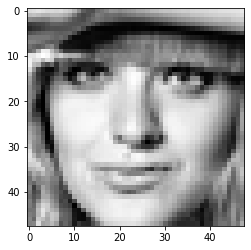

In [8]:
# Displaying the image instance
expression = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
def show_img_instance(index):
    pic = np.reshape(df.at[index, "pixels"].split(" "), (48, 48)).astype("float")
    pic /= np.std(pic)
    pic -= np.mean(pic)
    print(expression[df.at[index, "emotion"]])
    plt.imshow(pic, cmap="gray")
show_img_instance(152)  

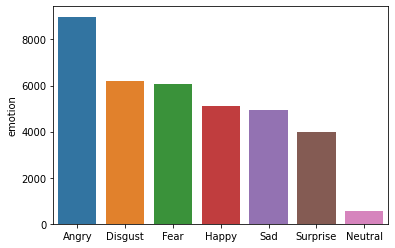

In [9]:
#plotting the total amount of data present in all the emotions 
ax = sns.barplot(x=expression, y=df.emotion.value_counts())

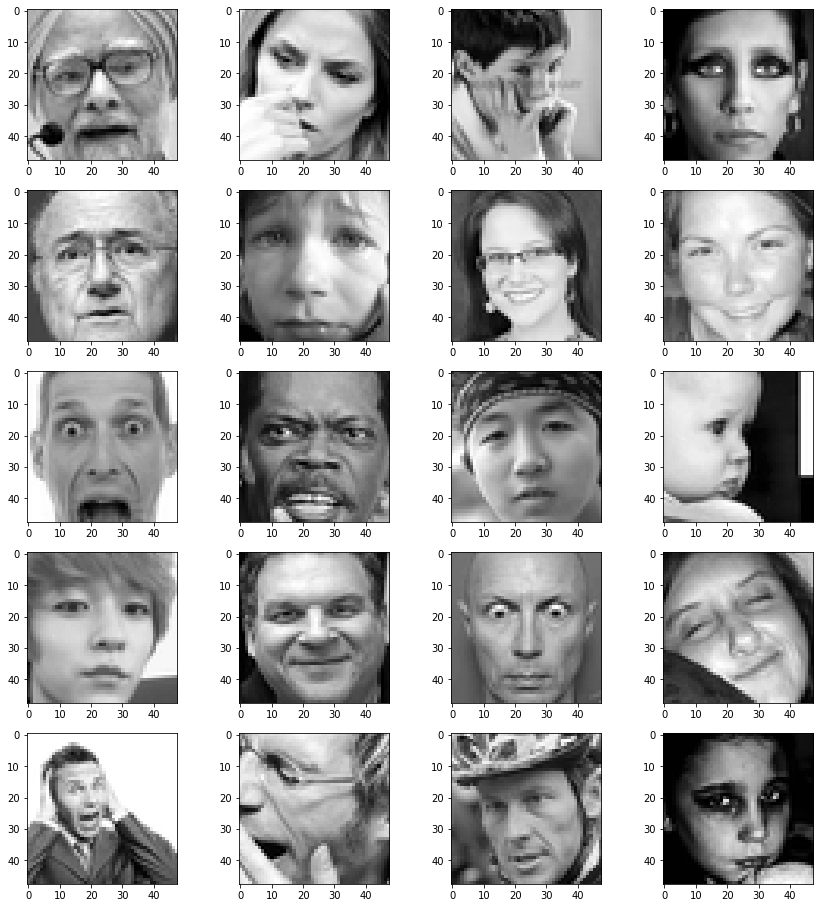

In [10]:
import seaborn as sns
plt.figure(0, figsize=(12,15))
for i in range(1, 21):
    plt.subplot(6,4,i)
    plt.imshow(pics[i, :, :, 0], cmap="gray")
plt.tight_layout()
plt.show()


In [11]:
training_data = df[["emotion", "pixels"]][(df["Usage"] == "Training")]
testing_data = df[["emotion", "pixels"]][(df["Usage"] == "PublicTest")]

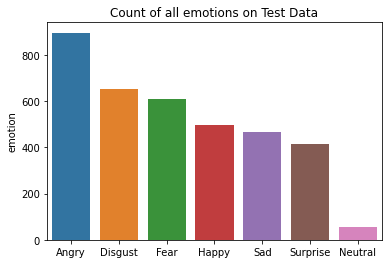

In [12]:
ax = sns.barplot(x=expression, y=testing_data.emotion.value_counts())
ax.set_title('Count of all emotions on Test Data');

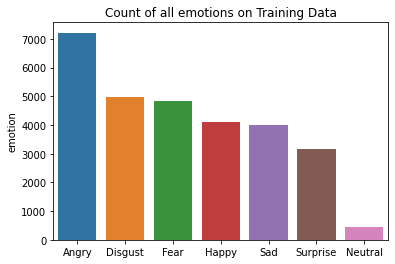

In [13]:
ax = sns.barplot(x=expression, y=training_data.emotion.value_counts())
ax.set_title('Count of all emotions on Training Data');

In [14]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

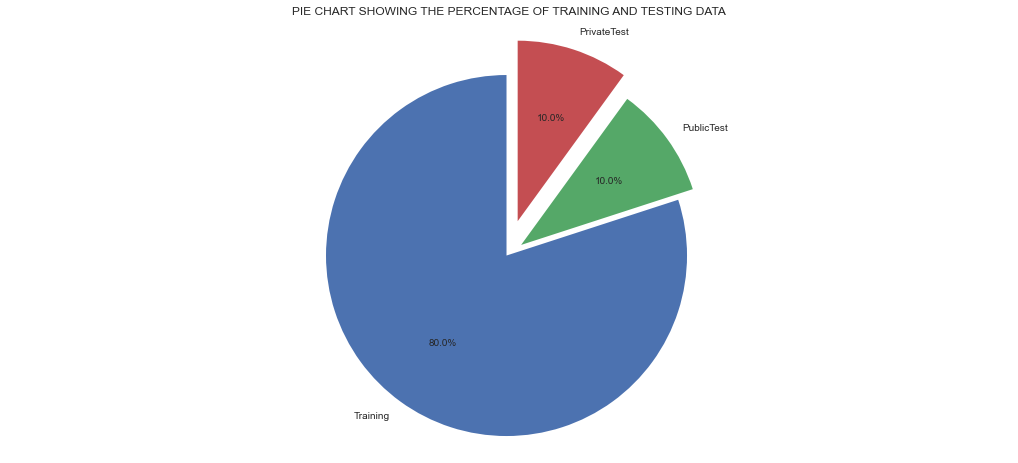

In [15]:
plt.style.use('seaborn')
dfdata = [28709,3589,3589]
labels = 'Training', 'PublicTest','PrivateTest' 
explode = [0, 0.1,0.2]

fig, (axes1) =  plt.subplots(figsize=(18,8))
axes1.pie(dfdata, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90)
axes1.axis('equal')
axes1.set_title("PIE CHART SHOWING THE PERCENTAGE OF TRAINING AND TESTING DATA")

plt.show()

In [16]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

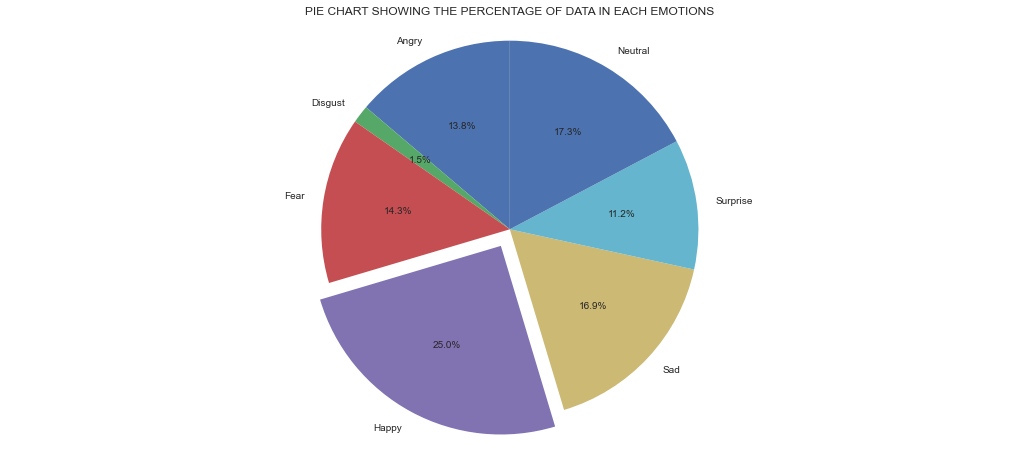

In [22]:
plt.style.use('seaborn')
dfdata = [4953,547,5121,8989,6077,4002,6198]
labels = "Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral" 
explode = [0, 0,0,0.1,0,0,0]

fig, (axes1) =  plt.subplots(figsize=(18,8))
axes1.pie(dfdata, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90)
axes1.axis('equal')
axes1.set_title("PIE CHART SHOWING THE PERCENTAGE OF DATA IN EACH EMOTIONS")

plt.show()